[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/expansion_chamber/expansion_experiment.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/expansion_chamber/expansion_experiment.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/expansion_chamber/expansion_experiment.ipynb)

modeling expansion-chamber experiments described in [Erinin et al. 2025](https://doi.org/10.48550/arXiv.2501.01467)

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
import numpy as np
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
from PySDM import Formulae
from PySDM.physics import si

from PySDM_examples.Erinin_et_al_2025.aerosol import AerosolChamber
from PySDM_examples.Erinin_et_al_2025.expansion_simulation import run_expansion

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mUnknown attribute 'k_B' of type Constants(float64, bool, int64, float64, float64, float64, float64, int64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, int64, int64, int64, float64, float64, float64, float64, float64, int64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, int64, float64, float64, float64, float64, float64, int64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, int64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64, float64)
[1m
File "<string>", line 10:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m
[0m[1mDuring: typing of get attribute at <string> (10)[0m
[1m
File "<string>", line 10:[0m
[1m<source missing, REPL/exec in use?>[0m


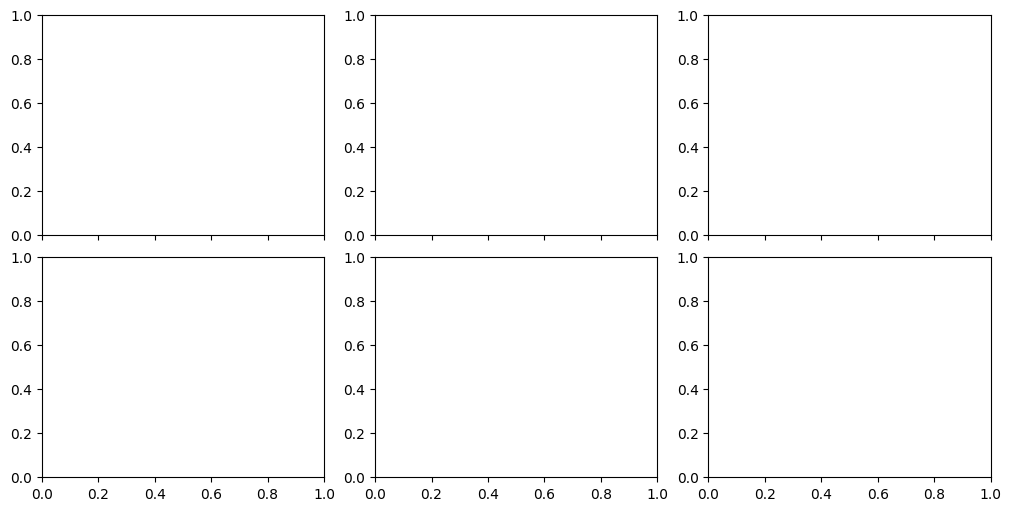

In [3]:
n_sd_per_mode = 20
DT = .1 * si.s

variables = ["p", "T", "s", "water_vapour_mixing_ratio", "liquid_water_mixing_ratio", "reff"]
offsets = [0, -273.15, 1, 0, 0, 0]
factors = [1/100, 1, 1, 1, 1, 1]
ylabels = ["Pressure [hPa]", "Temperature [°C]", "Saturation ratio", "$q_v$ [g kg$^{-1}$]", "$q_\ell$ [g kg$^{-1}$]", "$r_{eff}$ [$\mu$m]"]
fig,axes=pyplot.subplots(2,3,figsize=(10,5),sharex=True,sharey=False,constrained_layout=True)

for Na in [1e3, 1e4, 1e5]: #[1, 10, 100, 1000, 10000, 100000]:

    formulae = Formulae(
        adiabatic_exponent="MoistLeadingTerms",
        homogeneous_liquid_nucleation_rate='CNT',
    )
    const = formulae.constants
    aerosol = AerosolChamber(
            water_molar_volume=const.Mv / const.rho_w,
            N=Na / si.cm**3,
        )

    output = run_expansion(formulae, aerosol, n_sd_per_mode, total_time=4*si.s, dt=DT)
    
    for i,ax in enumerate(axes.flatten()):
        y = np.array(output.profile[variables[i]]) * factors[i] + offsets[i]
        ax.plot(output.profile["t"], y, label=f"{Na:.0e}")
        # if i == 2:
        #     ax.set_yscale("log")
        ax.set_xlabel("Time [s]")
        ax.set_ylabel(ylabels[i])

axes[0,0].legend(title="$C_0$ [cm$^{-3}$]")
show_plot("C0_sweep_traces.pdf")

In [4]:
n_sd_per_mode = 20

p0 = 1000 * si.hPa
dp = np.insert(np.linspace(100,600,11),0,1) * si.hPa
Tmin = np.zeros_like(dp)
Smax = np.zeros_like(dp)
Tmin_clean = np.zeros_like(dp)
Smax_clean = np.zeros_like(dp)
Tmin_dry = np.zeros_like(dp)
Smax_dry = np.zeros_like(dp)
for i,dpi in enumerate(dp):
    print(i,dpi)

    formulae = Formulae()
    const = formulae.constants
    aerosol = AerosolChamber(water_molar_volume=const.Mv / const.rho_w, N=2000 / si.cm**3)
    output = run_expansion(formulae, aerosol, n_sd_per_mode, RH0=0.5, p0=p0, pf=(p0 - dpi), dt=DT)
    Tmin[i] = np.nanmin(output.profile["T"]) - 273.15 # °C
    Smax[i] = np.nanmax(output.profile["s"]) + 1 # saturation ratio

    aerosol = AerosolChamber(water_molar_volume=const.Mv / const.rho_w, N=1 / si.cm**3)
    output = run_expansion(formulae, aerosol, n_sd_per_mode, RH0=0.5, p0=p0, pf=(p0 - dpi), dt=DT)
    Tmin_clean[i] = np.nanmin(output.profile["T"]) - 273.15 # °C
    Smax_clean[i] = np.nanmax(output.profile["s"]) + 1 # saturation ratio

    output = run_expansion(formulae, aerosol, n_sd_per_mode, RH0=0, p0=p0, pf=(p0 - dpi), dt=DT)
    Tmin_dry[i] = np.nanmin(output.profile["T"]) - 273.15 # °C
    Smax_dry[i] = np.nanmax(output.profile["s"]) + 1 # saturation ratio

print(dp)
print(Tmin)
print(Tmin_clean)
print(Tmin_dry)

0 100.0
1 10000.0
2 15000.0
3 20000.0
4 25000.0
5 30000.0
6 35000.0
7 40000.0
8 45000.0
9 50000.0
10 55000.0
11 60000.0
[  100. 10000. 15000. 20000. 25000. 30000. 35000. 40000. 45000. 50000.
 55000. 60000.]
[ 22.76539614  14.07241918   9.42251052   5.04148984   1.22854917
  -2.73095271  -7.13023918 -12.04458049 -17.52580689 -23.59720075
 -30.26381921 -37.57848389]
[ 22.76539835  14.07229129   9.41976599   4.56762734  -0.50557679
  -5.82580613 -11.4243729  -17.33934874 -23.61770124 -30.31832231
 -37.51668399 -45.31183296]
[ 22.76539833  14.0722912    9.41976459   4.56742887  -0.50663758
  -5.82842689 -11.42911249 -17.34657562 -23.62755213 -30.33073466
 -37.53139951 -45.32857413]


In [5]:
print("p0 =",p0,"Pa")
print("T0 =",296-273.15,"°C")
print("dp =",dp)
print("Tmin (S0=0.5, C0=2000) =", Tmin)
print("Tmin (S0=0.5, C0=1) =", Tmin_clean)
print("Tmin (S0=0, C0=1) =", Tmin_dry)

p0 = 100000.0 Pa
T0 = 22.850000000000023 °C
dp = [  100. 10000. 15000. 20000. 25000. 30000. 35000. 40000. 45000. 50000.
 55000. 60000.]
Tmin (S0=0.5, C0=2000) = [ 22.76539614  14.07241918   9.42251052   5.04148984   1.22854917
  -2.73095271  -7.13023918 -12.04458049 -17.52580689 -23.59720075
 -30.26381921 -37.57848389]
Tmin (S0=0.5, C0=1) = [ 22.76539835  14.07229129   9.41976599   4.56762734  -0.50557679
  -5.82580613 -11.4243729  -17.33934874 -23.61770124 -30.31832231
 -37.51668399 -45.31183296]
Tmin (S0=0, C0=1) = [ 22.76539833  14.0722912    9.41976459   4.56742887  -0.50663758
  -5.82842689 -11.42911249 -17.34657562 -23.62755213 -30.33073466
 -37.53139951 -45.32857413]


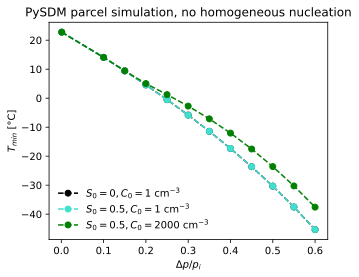

HTML(value="<a href='./Tmin_dp.pdf' target='_blank'>./Tmin_dp.pdf</a><br>")

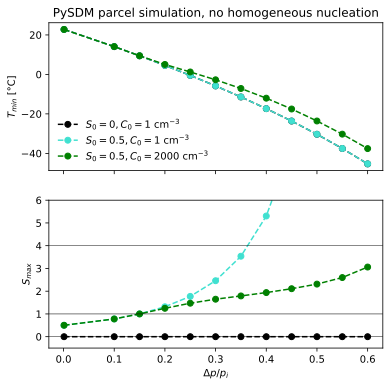

HTML(value="<a href='./dp_sweep.pdf' target='_blank'>./dp_sweep.pdf</a><br>")

In [6]:
fig,ax = pyplot.subplots(1,1,figsize=(5,4))
ax.plot(dp/p0, Tmin_dry, color="black", marker="o", ls="--", label="$S_0 = 0, C_0 = 1 $ cm$^{-3}$")
ax.plot(dp/p0, Tmin_clean, color="turquoise", marker="o", ls="--", label="$S_0 = 0.5, C_0 = 1 $ cm$^{-3}$")
ax.plot(dp/p0, Tmin, color="green", marker="o", ls="--", label="$S_0 = 0.5, C_0 = 2000$ cm$^{-3}$")
ax.set_xlabel(r"$\Delta p / p_i$")
ax.set_ylabel(r"$T_{min}$ [°C]")
ax.legend(loc=3, frameon=False)
ax.set_title("PySDM parcel simulation, no homogeneous nucleation")
show_plot("Tmin_dp.pdf")

#########

fig,axes = pyplot.subplots(2,1,figsize=(6,6),sharex=True)

ax = axes[0]
ax.plot(dp/p0, Tmin_dry, color="black", marker="o", ls="--", label="$S_0 = 0, C_0 = 1 $ cm$^{-3}$")
ax.plot(dp/p0, Tmin_clean, color="turquoise", marker="o", ls="--", label="$S_0 = 0.5, C_0 = 1 $ cm$^{-3}$")
ax.plot(dp/p0, Tmin, color="green", marker="o", ls="--", label="$S_0 = 0.5, C_0 = 2000$ cm$^{-3}$")
ax.set_ylabel(r"$T_{min}$ [°C]")
ax.legend(loc=3, frameon=False)
ax.set_title("PySDM parcel simulation, no homogeneous nucleation")

ax = axes[1]
ax.plot(dp/p0, Smax_dry, color="black", marker="o", ls="--", label="$S_0 = 0, C_0 = 1 $ cm$^{-3}$")
ax.plot(dp/p0, Smax_clean, color="turquoise", marker="o", ls="--", label="$S_0 = 0.5, C_0 = 1 $ cm$^{-3}$")
ax.plot(dp/p0, Smax, color="green", marker="o", ls="--", label="$S_0 = 0.5, C_0 = 2000$ cm$^{-3}$")
ax.set_xlabel(r"$\Delta p / p_i$")
ax.set_ylabel(r"$S_{max}$")
# ax.set_yscale("log")
ax.set_ylim(-0.5,6)
ax.axhline(0, color="k", lw=0.5)
ax.axhline(1, color="k", lw=0.5)
ax.axhline(4, color="k", lw=0.5)

show_plot("dp_sweep.pdf")